Replicating the analysis in Beiró et al 2004 with a small twist :)


About the Datasets

    Date format:
    The hour column is computed by integer dividing the timestamp by 3600 seconds. 
    For example, the first line of the network for "noaltarifazo_ruidazonacional" 
    has hour=429531. 
    This means a timestamp of 429531*3600=1546311600 and it implies that the pair 
    of hashtags (h1, h2) was used in the hour comprised between timestamp 1546311600 
    and timestamp 1546315200, which corresponds to "1 January 2019 0:00:00 - 0:00:00". 
    The event itself was centered on 4 January 2019.


Exercise goal - replicate Figure 6(ish) 
- Create a network per hour where:
    Nodes are user and nodes connect when the same hashtags were used between user
- Calculate modularity (use networkix.community) and nestedness

## Load data and import Packages

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import numpy as np
import networkx as nx
from networkx.algorithms import bipartite
from nestedness_master.nestedness_calculator import NestednessCalculator


from glob import glob
from tqdm import tqdm



In [55]:
# Data paths
n9_path = 'D:/FV/Personal/VIU/clean_data/9n_9ngranmarchaporlajusticia.csv'
noAlTar_path = 'D:/FV/Personal/VIU/clean_data/noaltarifazo_ruidazonacional.csv'

In [93]:
database

'D:/FV/Personal/VIU/clean'

In [95]:
file_path.split('\\')[-1]

'no_AlTar_429790_bipartite_link_list.pickle'

In [100]:
folder_path = 'D:/FV/Personal/VIU/clean_data/link_lists_after_cleaning/*bipartite*'
# folder_path = 'D:/FV/Personal/VIU/clean_data/bipartite_linkLists/*bipartite*'
files = glob(folder_path)

files = [f for f in files if '.csv' not in f]
file_path = files[0]

complete_df = pd.DataFrame()

for file_path in tqdm(files):
    hour = file_path.split('_link_list.pickle')[0].split('_')[-2]
    database = file_path.split('\\')[-1].split('_')[0]

    with open(file_path, 'rb') as f:
        link_list = pickle.load(f)

    clean_link_list = link_list

    clean_link_arr = np.array(clean_link_list)
    userNodes = np.unique(clean_link_arr[:,0])
    hashNodes = np.unique(clean_link_arr[:,1])

    nodes = np.concatenate([clean_link_arr[:,0], clean_link_arr[:,1]])

    G = nx.Graph()
    G.add_weighted_edges_from(clean_link_list)

    # Check if graph is bipartite
    is_bipartite = bipartite.is_bipartite(G)

    # Calculate modularity according to louvain method
    louvain_c = nx.community.louvain_communities(G)
    modularity = nx.community.modularity(G, louvain_c)

    # Calculate Nestedness
    mat = nx.adjacency_matrix(G, weight = 'None').todense()
    nestedness = NestednessCalculator(mat).nodf(mat)

    # get components
    components = sorted(nx.connected_components(G), key=len, reverse=True)
    nr_of_components = len(components)

    # Get database
    if database == '9n':
        db_df = pd.read_csv(n9_path)
        db_hour_df = db_df[db_df.hour == int(hour)]

    elif database == 'no':
        db_df = pd.read_csv(noAlTar_path)
        db_hour_df = db_df[db_df.hour == int(hour)]


    # Get nr of hashtag nodes
    total_nr_of_unique_hashs = len(hashNodes)

    # Get nr of user nodes
    total_nr_of_unique_user = len(userNodes)

    # Get total number of nodes
    total_nr_of_nodes = total_nr_of_unique_hashs + total_nr_of_unique_user

    # Get nr of hashtag nodes in giant component component
    total_nr_of_unique_hashs_gc = len([node for node in components[0] if str(node) in hashNodes])

    # Get nr of user nodes in giant component component
    total_nr_of_unique_user_gc = len([node for node in components[0] if str(node) in userNodes])

    # Get total number of nodes in giant component component
    total_nr_of_nodes_gc = total_nr_of_unique_hashs_gc + total_nr_of_unique_user_gc


    # Put Daa in Dataframe
    hour_df = pd.DataFrame([database, hour, modularity, nestedness, nr_of_components, 
                            total_nr_of_unique_hashs, total_nr_of_unique_user, total_nr_of_nodes,
                            total_nr_of_unique_hashs_gc, total_nr_of_unique_user_gc, total_nr_of_nodes_gc,
                            is_bipartite]).T

    complete_df = pd.concat([complete_df, hour_df])


complete_df.columns = ['db', 'hour', 'mod', 'nest', 'n_comp', 
                       'total_nr_of_hashs', 'total_nr_of_users', 'total_nr_of_nodes' ,
                       'nr_of_hashs_in_giant_c', 'nr_of_users_in_giant_c', 'nr_of_nodes_in_giant_c',
                        'is_bipartite']

# complete_df.to_csv('D:/FV/Personal/VIU/clean_data/graph_metrics_bipartite.csv')
complete_df.to_csv('D:/FV/Personal/VIU/clean_data/graph_metrics_bipartite_clean.csv')

complete_df

100%|██████████| 357/357 [21:15<00:00,  3.57s/it] 


,db,hour,mod,nest,n_comp,total_nr_of_hashs,total_nr_of_users,total_nr_of_nodes,nr_of_hashs_in_giant_c,nr_of_users_in_giant_c,nr_of_nodes_in_giant_c,is_bipartite
0,9n,436984,0.799473,0.011995,94,540,648,1188,375,543,918,True
0,9n,436985,0.755045,0.012358,91,617,883,1500,477,779,1256,True
0,9n,436986,0.75689,0.013009,118,567,855,1422,389,724,1113,True
0,9n,436987,0.74499,0.013533,109,568,797,1365,373,674,1047,True
0,9n,436988,0.740424,0.012282,95,648,786,1434,470,679,1149,True
...,...,...,...,...,...,...,...,...,...,...,...,...
0,no,429786,0.841645,0.006416,101,447,325,772,243,211,454,True
0,no,429787,0.87741,0.005393,95,450,277,727,258,152,410,True
0,no,429788,0.792546,0.006306,106,381,291,672,188,156,344,True
0,no,429789,0.839611,0.006348,95,354,249,603,159,129,288,True


In [42]:
complete_df

,db,hour,mod,nest,n_comp,total_nr_of_hashs,total_nr_of_users,total_nr_of_nodes,nr_of_hashs_in_giant_c,nr_of_users_in_giant_c,nr_of_nodes_in_giant_c,is_bipartite
0,9n,436984,0.798683,0.011995,94,540,648,1188,375,543,918,True


## Figure 6

In [111]:
graph_metrics_path = 'D:/FV/Personal/VIU/clean_data/graph_metrics_bipartite.csv'
# graph_metrics_path = 'D:/FV/Personal/VIU/clean_data/graph_metrics_bipartite_clean.csv'

graph_metrics_df = pd.read_csv(graph_metrics_path, index_col=0)

graph_metrics_df['date'] = pd.to_datetime(graph_metrics_df.hour * 3600, unit='s', 
                                          )

graph_metrics_df.head()

,db,hour,mod,nest,n_comp,total_nr_of_hashs,total_nr_of_users,total_nr_of_nodes,nr_of_hashs_in_giant_c,nr_of_users_in_giant_c,nr_of_nodes_in_giant_c,is_bipartite,date
0,9n,436984,0.809207,0.011050,106,577,648,1225,392,529,921,True,2019-11-07 16:00:00
0,9n,436985,0.765543,0.011039,111,669,883,1552,499,762,1261,True,2019-11-07 17:00:00
0,9n,436986,0.765082,0.012123,127,601,855,1456,409,717,1126,True,2019-11-07 18:00:00
0,9n,436987,0.753313,0.012652,121,600,797,1397,374,665,1039,True,2019-11-07 19:00:00
0,9n,436988,0.740867,0.011647,105,676,786,1462,470,672,1142,True,2019-11-07 20:00:00


C:\Users\neuro\AppData\Local\Temp\ipykernel_12440\556988599.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'high_modularity'] = 'no'


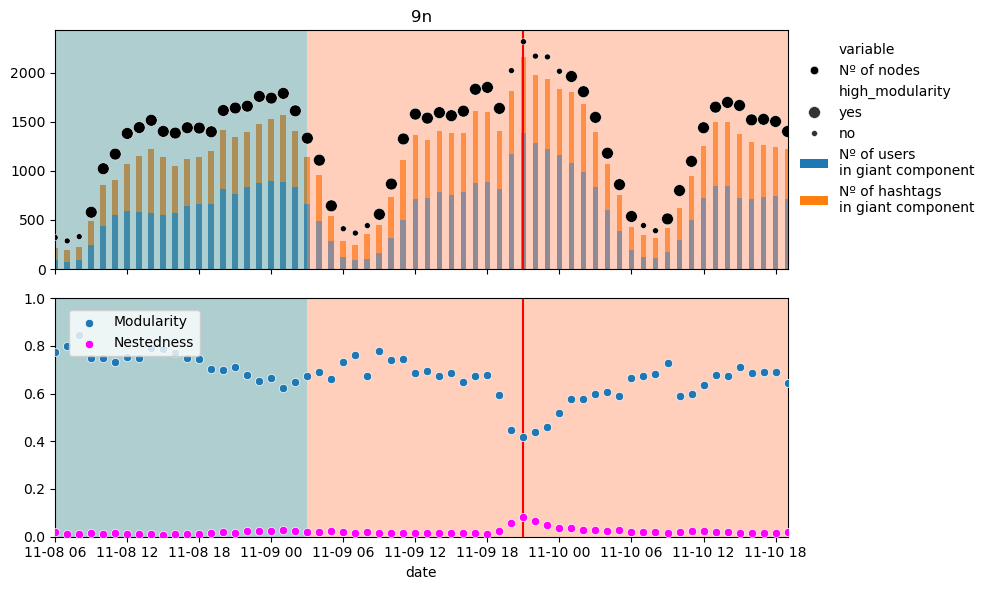

In [112]:
db = '9n'

df = graph_metrics_df.loc[(graph_metrics_df.db == db) & 
                             (graph_metrics_df.date <= '2019-11-10 19:00') & 
                             (graph_metrics_df.date >= '2019-11-08 06:00'), :]


def plot_figure6(df, db, total_users = True):

    fig, axes = plt.subplots(2,1, figsize = [10, 6],sharex=True)

    df.loc[:,'high_modularity'] = 'no'
    if total_users:
        df.loc[(df['mod'] > .55) & (df.total_nr_of_nodes > 0.2*df.total_nr_of_nodes.max()), 'high_modularity'] = 'yes'
    else:
        df.loc[(df['mod'] > .55) & (df.total_nr_of_nodes > 0.2*df.total_nr_of_nodes.max()), 'high_modularity'] = 'yes'

    df1 = df[['date', 'total_nr_of_nodes', 'high_modularity']].melt(id_vars = ['date', 'high_modularity'])
    df1['variable'] = df1.variable.replace({'nr_of_nodes_in_giant_c': 'Nº of nodes in\nthe giant component',
                                          'total_nr_of_nodes':  'Nº of nodes'})
    # Axis 0
    sns.scatterplot(data = df1, x = 'date', y = 'value', hue= 'variable', 
                    # style='high_modularity', style_order = ['yes', 'no'],
                    size = 'high_modularity', size_order = ['yes', 'no'],
                    palette = ['black',], zorder = 5, ax = axes[0])
    
    df2 = df[['date', 'nr_of_users_in_giant_c', 'nr_of_hashs_in_giant_c']]

    axes[0].bar(df2['date'], df2['nr_of_users_in_giant_c'], 
                color=sns.color_palette()[0], width=0.02, label = 'Nº of users\nin giant component')
    axes[0].bar(df2['date'], df2['nr_of_hashs_in_giant_c'], bottom=df2['nr_of_users_in_giant_c'], 
                color=sns.color_palette()[1], width=0.02, label = 'Nº of hashtags\nin giant component')
    axes[0].legend()
    sns.move_legend(
        axes[0], loc='upper left',
        bbox_to_anchor=(1, 1), ncol=1, title=None,
        frameon=False
    )

    # sns.scatterplot(data = df, x = 'date', y = 'nr_of_unique_hashs_in_giant_c', style='high_modularity', color = 'red', zorder = 5, ax = axes[0], label = 'Nº of hashtags in\nthe giant component')
    # sns.scatterplot(data = df, x = 'date', y = 'total_nr_of_unique_hashs', style='high_modularity', zorder = 5, color = 'black', ax = axes[0], label = 'Nº of hashtags')
    # Axis 1
    sns.scatterplot(data = df, x = 'date', y = 'mod', zorder = 5, ax = axes[1], label = 'Modularity')
    sns.scatterplot(data = df, x = 'date', y = 'nest', color = 'magenta', zorder = 5, ax = axes[1], label = 'Nestedness')
    # Add Axes spans and annotations
    if db == '9n':
        axes[0].axvline(x = pd.to_datetime('2019-11-09 21:00'), color = 'red')
        axes[0].axvspan(df.date.min(), '2019-11-09 03:00', facecolor='cadetblue', alpha=0.5)
        axes[0].axvspan('2019-11-09 03:00', df.date.max(), facecolor='lightsalmon', alpha=0.5)
        axes[0].set_xlim([df.date.min(), df.date.max() ]);
        # axes[0].legend(bbox_to_anchor=(0.01, 0.98), loc='upper left', )
        # ==========
        axes[1].axvline(x = pd.to_datetime('2019-11-09 21:00'), color = 'red')
        axes[1].axvspan(df.date.min(), '2019-11-09 03:00', facecolor='cadetblue', alpha=0.5)
        axes[1].axvspan('2019-11-09 03:00', df.date.max(), facecolor='lightsalmon', alpha=0.5)
        axes[1].set_xlim([df.date.min(), df.date.max() ]);
        axes[1].set_ylim([0,1]);
        axes[1].legend(bbox_to_anchor=(0.01, 0.98), loc='upper left', )
        for ax in axes:
            ax.set_ylabel('')
        axes[0].set_title('9n')

    elif db== 'no':
        axes[0].axvline(x = pd.to_datetime('2019-01-05 00:00'), color = 'red')
        axes[0].axvspan(df.date.min(), '2019-01-04 03:00', facecolor='cadetblue', alpha=0.5)
        axes[0].axvspan('2019-01-04 03:00', df.date.max(), facecolor='lightsalmon', alpha=0.5)
        axes[0].set_xlim([df.date.min(), df.date.max() ]);
        # axes[0].legend(bbox_to_anchor=(0.01, 0.98), loc='upper left', )
        # ==========
        axes[1].axvline(x = pd.to_datetime('2019-01-05 00:00'), color = 'red')
        axes[1].axvspan(df.date.min(), '2019-01-04 03:00', facecolor='cadetblue', alpha=0.5)
        axes[1].axvspan('2019-01-04 03:00', df.date.max(), facecolor='lightsalmon', alpha=0.5)
        axes[1].set_xlim([df.date.min(), df.date.max() ]);
        axes[1].set_ylim([0,1]);
        axes[1].legend(bbox_to_anchor=(0.01, 0.98), loc='upper left', )
        for ax in axes:
            ax.set_ylabel('')
        axes[0].set_title('No al tarifazo')
    
    plt.tight_layout()
    return fig, axes

fig, axes = plot_figure6(df, db, total_users=False)
# plt.savefig('D:/FV/Personal/VIU/figures/f6_bipartite_9n_clean.png',transparent=True,bbox_inches='tight',pad_inches=0)
plt.savefig('D:/FV/Personal/VIU/figures/f6_bipartite_9n.png',transparent=True,bbox_inches='tight',pad_inches=0)

# fig, axes = plot_figure6(df, db, total_users=True)
# plt.savefig('D:/FV/VIU/f6_userNodes_9n_totalHashs.png',transparent=True,bbox_inches='tight',pad_inches=0)

C:\Users\neuro\AppData\Local\Temp\ipykernel_12440\556988599.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'high_modularity'] = 'no'


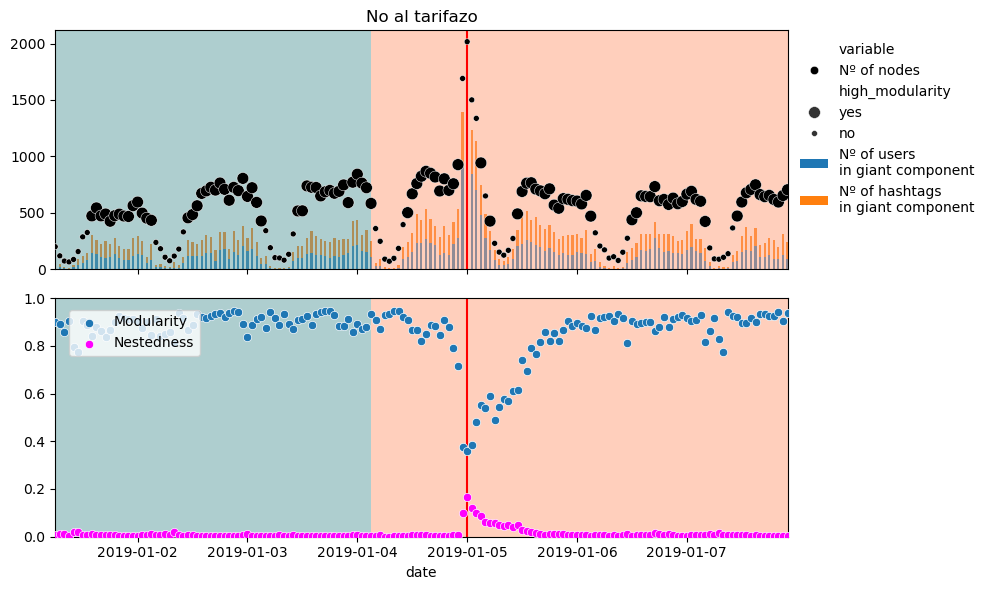

In [113]:

db = 'no'

df = graph_metrics_df.loc[(graph_metrics_df.db == db) & 
                             (graph_metrics_df.date >= '2019-01-01 06:00') & 
                             (graph_metrics_df.date <= '2019-01-07 22:00'), :]


fig, axes = plot_figure6(df, db, total_users=False)
# plt.savefig('D:/FV/Personal/VIU/figures/f6_bipartite_no_al_tarifazo_clean.png',transparent=True,bbox_inches='tight',pad_inches=0)
plt.savefig('D:/FV/Personal/VIU/figures/f6_bipartite_no_al_tarifazo.png',transparent=True,bbox_inches='tight',pad_inches=0)

# fig, axes = plot_figure6(df, db, total_users=True)
# plt.savefig('D:/FV/VIU/f6_userNodes_no_al_tarifazo_totalHashs.png',transparent=True,bbox_inches='tight',pad_inches=0)